<a href="https://colab.research.google.com/github/Vct-Jully/Analise_de_dados_dataframe/blob/main/Lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 1 Ciência de Dados
*Realize análises estatísticas e visualizações de dados para entender o comportamento dos dados e identificar tendências e padrões.*

## **Preparação**
 Criação de um data frame com valores aleatórios para os próximos passos

 Gerar um novo arquivo aqui pode causar problemas a todas as novas análises, para isso deixei os arquivos utilizados aqui: https://drive.google.com/drive/folders/1b_tq67FYd1kgu8ht3oSPnxY-Qrz72YKm?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np

numLinhas = 100
numColunas = 4

#Criação de Data Frame vazio
df = pd.DataFrame( index = range(numLinhas), columns = ['Data','Produto','Quantidade', 'Preço'])

#Definir Data com datas aleatórias
df['Data'] = pd.date_range(start='2023-01-01', end='2024-07-31', periods = numLinhas)

#Definir Produtos e alocar aleatoriamente em Produto
produtos = ['Sorvete de Chocolate', 'Sorvete de Caramelo', 'Sorvete de Pistache', 'Brownie de Chocolate', 'Bolo RedVelvet']
df['Produto'] = np.random.choice(produtos, size = numLinhas)

#Definir Quantidade aleatória
df['Quantidade'] = np.random.randint(1,100, size = numLinhas)

#Definir preços por produto
preços_iniciais = {
    'Sorvete de Chocolate': 10.00,
    'Sorvete de Caramelo': 15.00,
    'Sorvete de Pistache': 19.00,
    'Brownie de Chocolate': 7.00,
    'Bolo RedVelvet': 22.00
}

# Atribuir preço inicial para cada produto
df['Preço'] = df['Produto'].map(preços_iniciais)

#Definindo uma inflação de 20% a cada 6 meses para todos os produtos
inflação = 0.2
df['Preço']= df['Preço'] * (1+inflação) ** (df['Data'].dt.month // 6)

#  Definir uma promoção de 20% para o mês de abril
df.loc[(df['Data'].dt.month == 4), 'Preço'] *= 0.8

# Arredondar preços para dois números após a vírgula
df['Preço'] = df['Preço'].round(2)

#Armazenando em arquivo csv e xlsx
df.to_csv('/content/drive/MyDrive/CDLista1/vendas.csv', index = False)
df.to_excel('/content/drive/MyDrive/CDLista1/vendas1.xlsx', index = False)

print("data frame criado com sucesso!")




data frame criado com sucesso!


---
## 1. Aquisição de Dados e Leitura


---
Escreva um script em Python que leia um arquivo CSV contendo dados de
vendas de uma empresa. O arquivo deve conter as seguintes colunas:
- Data,
- Produto
- Quantidade
- Preço

Utilize a biblioteca pandas para ler o arquivo e
exibir as primeiras 5 linhas do DataFrame resultante.

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CDLista1/vendas.csv')
print(df.head())

                            Data               Produto  Quantidade  Preço
0  2023-01-01 00:00:00.000000000  Sorvete de Chocolate          78   10.0
1  2023-01-06 19:52:43.636363636   Sorvete de Pistache          48   19.0
2  2023-01-12 15:45:27.272727272   Sorvete de Caramelo          13   15.0
3  2023-01-18 11:38:10.909090909   Sorvete de Pistache          85   19.0
4  2023-01-24 07:30:54.545454545   Sorvete de Caramelo          73   15.0


---
## 2. Pré-processamento de Dados
---

Limpe os dados lidos no exercício anterior removendo linhas com valores nulos
e convertendo a coluna Data para o tipo datetime. Em seguida, normalize a
coluna Quantidade para que os valores estejam entre 0 e 1.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CDLista1/vendas.csv')
df = df.dropna() # Remove linhas com valores nulos
df['Data'] = pd.to_datetime(df['Data'])
df['Data'] = df['Data'].dt.strftime('%Y-%m-%d') # Formatando a data
print(df['Data'])

0     2023-01-01
1     2023-01-06
2     2023-01-12
3     2023-01-18
4     2023-01-24
         ...    
95    2024-07-07
96    2024-07-13
97    2024-07-19
98    2024-07-25
99    2024-07-31
Name: Data, Length: 100, dtype: object


# 3. Análise Estatística
----
Calcule a média, mediana, desvio padrão e moda para a coluna Preço do
DataFrame resultante do pré-processamento.


In [ ]:
import statistics as st

media = st.mean(df['Preço'])
mediana = st.median(df['Preço'])
desvio = st.stdev(df['Preço'])
moda = st.mode(df['Preço'])

print(f'Média: {media:.3f}')
print(f'Mediana: {mediana:.3f}')
print(f'Desvio padrão: {desvio:.3f}')
print(f'Moda: {moda:.3f}')

Média: 15.848
Mediana: 15.000
Desvio padrão: 6.800
Moda: 7.000


# 4. Visualização de Dados
----
Crie um gráfico de barras utilizando a biblioteca matplotlib ou seaborn que
mostre a quantidade total vendida de cada produto. O eixo x deve representar
os produtos e o eixo y a quantidade total vendida.

<BarContainer object of 5 artists>

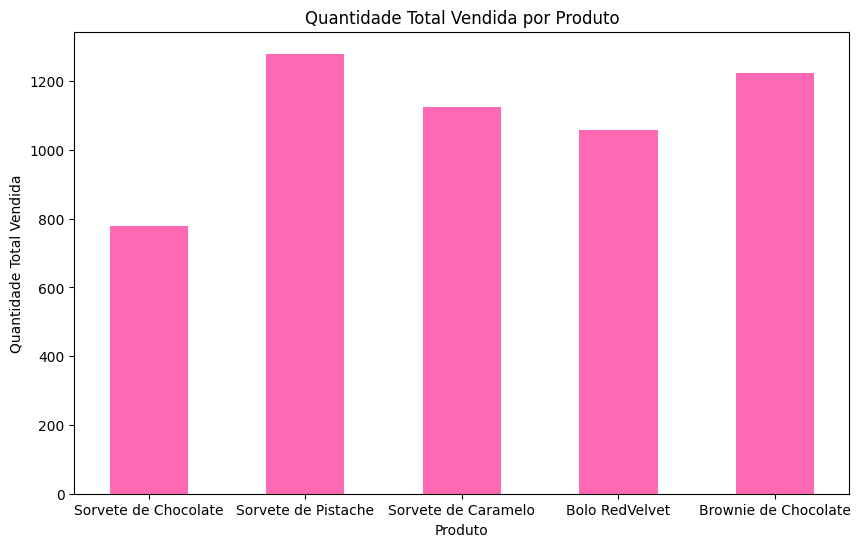

In [ ]:
import matplotlib.pyplot as plt

produtos = df['Produto'].unique()
quantidade_total = df.groupby('Produto')['Quantidade'].sum()

plt.figure(figsize=(10, 6))
plt.title('Quantidade Total Vendida por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Total Vendida')
plt.bar(produtos, quantidade_total, width = 0.5, color = 'hotpink')


# 5.1 K-Vizinhos Mais Próximos
----

Usando a mesma base de dados, crie uma coluna binária chamada
Alta_Venda, onde o valor é 1 se a quantidade vendida for maior que a média e
0 caso contrário.

In [ ]:
df['Alta_Venda'] = 0 # Define 0 como padrão
df.loc[df['Quantidade'] > df['Quantidade'].mean(), 'Alta_Venda'] = 1 # condicional para 1
print(df)

          Data               Produto  Quantidade  Preço  Alta_Venda  Cluster
0   2023-01-01  Sorvete de Chocolate          78   10.0           1        1
1   2023-01-06   Sorvete de Pistache          48   19.0           0        2
2   2023-01-12   Sorvete de Caramelo          13   15.0           0        0
3   2023-01-18   Sorvete de Pistache          85   19.0           1        3
4   2023-01-24   Sorvete de Caramelo          73   15.0           1        1
..         ...                   ...         ...    ...         ...      ...
95  2024-07-07  Sorvete de Chocolate          88   12.0           1        1
96  2024-07-13   Sorvete de Caramelo          12   18.0           0        2
97  2024-07-19   Sorvete de Caramelo          79   18.0           1        3
98  2024-07-25        Bolo RedVelvet          61   26.4           1        3
99  2024-07-31   Sorvete de Caramelo          15   18.0           0        2

[100 rows x 6 columns]


#5.2 Classificação
---
Em seguida, crie um modelo de classificação utilizando o
algoritmo K-Vizinhos Mais Próximos (KNN) para prever se uma venda será alta
ou não. Avalie o modelo utilizando a matriz de confusão.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

x = df[['Preço', 'Quantidade']]
y = df['Alta_Venda']

# Treino / Teste
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

# Treinar
knn.fit(x_tr, y_tr)

# Previsões
y_pred = knn.predict(x_te)
print(y_te) # valor correto
print(y_pred) # valor da previsão
9
# Calcular a matriz de confusão
cm_for_df = confusion_matrix(y_te, y_pred)
print("Matriz de Confusão:")
print(cm_for_df)


83    0
53    1
70    1
45    0
44    0
39    1
22    0
80    0
10    1
0     1
18    1
30    0
73    1
33    0
90    0
4     1
76    0
77    1
12    1
31    1
Name: Alta_Venda, dtype: int64
[0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1]
Matriz de Confusão:
[[ 9  0]
 [ 0 11]]


# 6. Agrupamento - K-means
---
Utilize o algoritmo K-means para agrupar os produtos com base em suas
quantidades vendidas e preços. Determine o número ideal de clusters
utilizando o método do cotovelo (elbow method).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

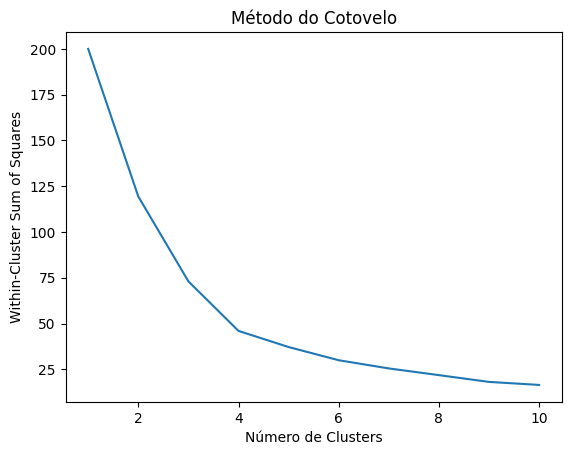

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

x = df[['Quantidade', 'Preço']]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Minimização da dispersão dos clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


Definir número de clusters com base no gráfico:

**número de clusters** = 4

In [ ]:
n_cl = 4

kmeans = KMeans(n_clusters=n_cl, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Calcular as médias padrões dos clusters
centroids = kmeans.cluster_centers_
print(f"Centroides: {centroids}")

# Agrupar os dados por cluster
for i in range(n_cl):
  cluster_data = df[df['Cluster'] == i]
  df.to_csv('/content/drive/MyDrive/CDLista1/vendasNovo.csv', index = False)
  df.to_excel('/content/drive/MyDrive/CDLista1/vendasNovo.xlsx', index = False)
  print(f"\nCluster {i}:")
  print(cluster_data.describe())
  print()
  print("Quantidade de Ocorrências:\n",cluster_data['Produto'].value_counts())

print("\n")
qtd_Produto = df.groupby(['Produto', 'Cluster'])['Quantidade'].sum().reset_index()
print("quantidade total de produto vendida por cluster: \n", qtd_Produto)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroides: [[-0.9232157  -0.92351561]
 [ 0.86084452 -0.77442203]
 [-1.05852058  0.86683911]
 [ 0.6800743   0.93531993]]

Cluster 0:
       Quantidade      Preço  Alta_Venda  Cluster
count    20.00000  20.000000        20.0     20.0
mean     28.25000   9.600000         0.0      0.0
std      14.92393   3.361078         0.0      0.0
min       2.00000   5.600000         0.0      0.0
25%      18.25000   7.000000         0.0      0.0
50%      28.50000   8.200000         0.0      0.0
75%      36.75000  12.000000         0.0      0.0
max      53.00000  15.000000         0.0      0.0

Quantidade de Ocorrências:
 Produto
Brownie de Chocolate    10
Sorvete de Caramelo      6
Sorvete de Chocolate     4
Name: count, dtype: int64

Cluster 1:
       Quantidade      Preço  Alta_Venda  Cluster
count   32.000000  32.000000        32.0     32.0
mean    79.343750  10.608750         1.0      1.0
std     11.338229   2.894867         0.0      0.0
min     55.000000   5.600000         1.0      1.0
25%     71.

# 7. Análise de Clusters
---
Descreva as características de cada cluster encontrado no exercício anterior.
Identifique quais produtos estão em cada cluster e discuta possíveis razões
para esses agrupamentos.

#### Cluster 0:
Brownie de Chocolate, Sorvete de Caramelo, Sorvete de Chocolate.
Envolve em maior parte os produtos de preços abaixo da média geral, nenhum produto teve alta venda mas as vendas não foram tão baixas
Houve uma demanda comum, padrão de sabores comuns.

#### Cluster 1:
Sorvete de Chocolate, Brownie de Chocolate, Sorvete de Caramelo, Sorvete de Pistache.
Envolve variados produtos, geral de menor custo, porém tem uma ocorrência de sorvete de pistache, que custa 19 reais, e o preço máximo desse cluster foi de 15,20 logo aqui pode ter ocorrido uma promoção, provavelmente no de pistache, no brownie e no sorvete de caramelo.
Aqui houve uma alta demanda, maior parte dos produtos vendeu mais que a média comum pode ocorrer por preços atrativos e sabores de consumo comuns.

#### Cluster 2:
Sorvete de Caramelo, Bolo RedVelvet, Sorvete de Pistache.
Envolve os produtos de custo mais alto, aqui aparentemente houve um aumento significativo no valor de todos os produtos e nenhum produto com alta venda, isso pode acontecer por sazonalidade dos sabores, preço elevado ou outros fatores.

#### Cluster 3:
Sorvete de Caramelo, Bolo RedVelvet, Sorvete de Pistache.
Envolve os produtos de maiores preços, os mesmos do cluster, porém aqui temos alta venda apesar de produtos acima da média geral e com valores até mais altos do que o do cluster 2,  podem ter uma base de clientes mais restrita, um público alvo com maior poder aquisitivo ou um período de tendência de mercado.

# 8. Visualização de Clusters
---
Crie uma visualização que mostre os clusters formados pelo algoritmo
K-means. Utilize um gráfico de dispersão, onde cada ponto representa um
produto, e cores diferentes representam os diferentes clusters.

          Data               Produto  Quantidade  Preço  Alta_Venda  Cluster
0   2023-01-01  Sorvete de Chocolate          78   10.0           1        1
1   2023-01-06   Sorvete de Pistache          48   19.0           0        2
2   2023-01-12   Sorvete de Caramelo          13   15.0           0        0
3   2023-01-18   Sorvete de Pistache          85   19.0           1        3
4   2023-01-24   Sorvete de Caramelo          73   15.0           1        1
..         ...                   ...         ...    ...         ...      ...
95  2024-07-07  Sorvete de Chocolate          88   12.0           1        1
96  2024-07-13   Sorvete de Caramelo          12   18.0           0        2
97  2024-07-19   Sorvete de Caramelo          79   18.0           1        3
98  2024-07-25        Bolo RedVelvet          61   26.4           1        3
99  2024-07-31   Sorvete de Caramelo          15   18.0           0        2

[100 rows x 6 columns]


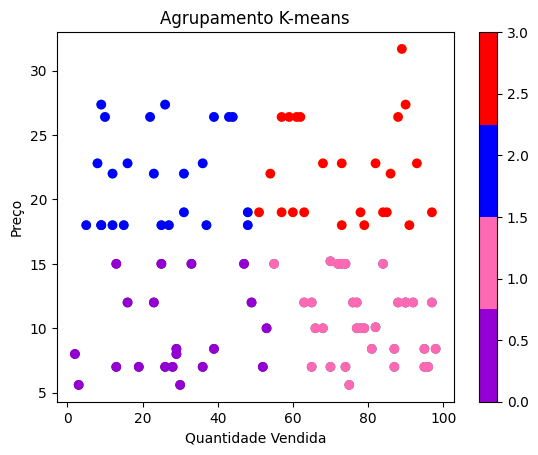

In [ ]:
import matplotlib as mpl

print(df)
plt.scatter(df['Quantidade'], df['Preço'], c=df['Cluster'])
plt.title('Agrupamento K-means')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Preço')
colors = ['darkviolet', 'hotpink', 'blue', 'red']
plt.scatter(df['Quantidade'], df['Preço'], c=df['Cluster'], cmap=mpl.colors.ListedColormap(colors))
plt.colorbar()
plt.show()

# 9. Validação Cruzada
---
Realize uma validação cruzada de 5 vezes para o modelo KNN criado no
exercício 5. Compare os resultados obtidos e discuta a estabilidade do modelo.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn, x, y, cv=kf)

print("Acurácia de cada fold:", knn_scores)
print("Acurácia média:", knn_scores.mean())
print("Desvio padrão:", knn_scores.std())


Acurácia de cada fold: [1.   0.95 0.9  1.   1.  ]
Acurácia média: 0.97
Desvio padrão: 0.039999999999999994


# 10. Tomada de Decisão baseada em Clustering
---
● **Com base nos clusters identificados, escreva um script que sugira
estratégias de marketing. Por exemplo, para cada cluster, decida se é
melhor aumentar ou diminuir o preço dos produtos, lançar promoções
ou focar em marketing específico.**

#### Cluster 0:
Para produtos básicos, o foco deve ser na fidelização dos clientes e no aumento do ticket médio. Implementar um programa de pontos simples e oferecer combos econômicos. Crie um conteúdo prático com receitas e dicas para incentivar o consumo.

#### Cluster 1:

Em produtos populares, o objetivo é fortalecer a marca e personalizar a experiência do cliente. Investir em uma identidade visual forte e criar programas de fidelidade personalizados. Organize eventos temáticos e lance edições limitadas para gerar interesse.

#### Cluster 2:

Para produtos premium, a estratégia é fortalecer a percepção de valor e aumentar a visibilidade da marca. Investir em embalagens exclusivas e criar narrativas em torno dos produtos. Melhorar o ambiente e oferecer experiências personalizadas.

#### Cluster 3:

Em produtos de alta demanda e alto valor, o foco é maximizar a satisfação do cliente e expandir o portfólio. Implementar um programa de fidelidade robusto, acrescentar brindes e oferecer atendimento personalizado. Lançar novos produtos complementares e otimizar os canais de venda.








● **Aplique essas mudanças aos dados históricos e compare os resultados
antes e depois da aplicação das estratégias usando métodos
estatísticos como teste t, teste de Wilcoxon, ou análise de variância
(ANOVA) para avaliar se as mudanças implementadas tiveram um
impacto significativo nas vendas.**



In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CDLista1/vendasNovo.csv')

def aplicar_melhorias(row):
    fator_quantidade = 1.0
    fator_preco = 1.0

    if row['Cluster'] == 0:
        fator_quantidade = 1.10  # Aumentar quantidade em 10%
    elif row['Cluster'] == 1:
        fator_preco = 1.10  # Aumentar preço em 10%
        fator_quantidade = 1.15  # Aumentar quantidade em 15%
    elif row['Cluster'] == 2:
        fator_quantidade = 1.20  # Aumentar quantidade em 20%
    elif row['Cluster'] == 3:
        fator_quantidade = 1.15  # Aumentar quantidade em 15%

    row['Quantidade'] *= fator_quantidade
    row['Preço'] *= fator_preco
    row['Venda'] = row['Quantidade'] * row['Preço']
    return row

# Aplicar melhorias ao dataframe
df_melhorado = df.apply(aplicar_melhorias, axis=1)
df_melhorado.to_csv('/content/drive/MyDrive/CDLista1/vendasMelhorado.csv', index=False)
print(df_melhorado)

          Data               Produto  Quantidade  Preço  Alta_Venda  Cluster  \
0   2023-01-01  Sorvete de Chocolate       89.70   11.0           1        1   
1   2023-01-06   Sorvete de Pistache       57.60   19.0           0        2   
2   2023-01-12   Sorvete de Caramelo       14.30   15.0           0        0   
3   2023-01-18   Sorvete de Pistache       97.75   19.0           1        3   
4   2023-01-24   Sorvete de Caramelo       83.95   16.5           1        1   
..         ...                   ...         ...    ...         ...      ...   
95  2024-07-07  Sorvete de Chocolate      101.20   13.2           1        1   
96  2024-07-13   Sorvete de Caramelo       14.40   18.0           0        2   
97  2024-07-19   Sorvete de Caramelo       90.85   18.0           1        3   
98  2024-07-25        Bolo RedVelvet       70.15   26.4           1        3   
99  2024-07-31   Sorvete de Caramelo       18.00   18.0           0        2   

       Venda  
0    986.700  
1   1094.

In [ ]:
import pandas as pd
from scipy import stats

df_original = pd.read_csv('/content/drive/MyDrive/CDLista1/vendasNovo.csv')
df_melhorado = pd.read_csv('/content/drive/MyDrive/CDLista1/vendasMelhorado.csv')

df_original['Período'] = 'Antes'
df_melhorado['Período'] = 'Depois'

df_combinado = pd.concat([df_original, df_melhorado])

for cluster in df_combinado['Cluster'].unique():
    # Filtrar os dados para o cluster e período desejados
    dados_antes = df_combinado[(df_combinado['Período'] == 'Antes') & (df_combinado['Cluster'] == cluster)]['Quantidade']
    dados_depois = df_combinado[(df_combinado['Período'] == 'Depois') & (df_combinado['Cluster'] == cluster)]['Quantidade']

    # Realizar ANOVA
    if len(dados_antes) > 0 and len(dados_depois) > 0:
        resultado_anova = stats.f_oneway(dados_antes, dados_depois)

        print(f'Cluster: {cluster}')
        print(f'Valor F da ANOVA: {resultado_anova.statistic}')
        print(f'Valor p da ANOVA: {resultado_anova.pvalue}')

Cluster: 1
Valor F da ANOVA: 15.181397361784532
Valor p da ANOVA: 0.0002420954482763431
Cluster: 2
Valor F da ANOVA: 1.1986034623352835
Valor p da ANOVA: 0.27930047378728245
Cluster: 0
Valor F da ANOVA: 0.3242710847512089
Valor p da ANOVA: 0.5724031868658683
Cluster: 3
Valor F da ANOVA: 6.225166111039562
Valor p da ANOVA: 0.01624628728560365


● **Gere um relatório resumindo os resultados da análise estatística e
discuta se as estratégias de marketing sugeridas foram eficazes.**

## Resultados:

**Cluster 0:** Similar ao Cluster 2, não foram encontradas diferenças significativas na "Quantidade" de vendas (valor-p = 0,572). As estratégias não tiveram o efeito desejado para este cluster.

**Cluster 1:** As estratégias de marketing foram altamente eficazes para este cluster (valor-p = 0,00024). Observou-se um aumento estatisticamente significativo na Quantidade de vendas após a implementação das estratégias.

**Cluster 2:** Não foram observadas diferenças significativas na "Quantidade" de vendas após a aplicação das estratégias (valor-p = 0,279). As estratégias não foram eficazes para este cluster, ou outros fatores podem estar influenciando os resultados.

**Cluster 3:** Os resultados para este cluster são levementen significativos (valor-p = 0,016). É possível que as estratégias tenham tido um pequeno efeito positivo, mas é necessário analisar outros fatores para confirmar.

As estratégias de marketing foram mais adequadas ao cluster 1, porém também teve sua relevância no cluster 3.